In [1]:
%load_ext autoreload
%autoreload 2 

In [1]:
import torch
import numpy as np
from neuralnet import  SQNet
from data import solver_norms
from utils import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def network_norms(net, xtest):
    cost = net(torch.tensor(xtest, dtype=torch.float32)).detach().numpy().reshape(-1,1)
    
    norm_g      = []
    norm_h       = []

    states = torch.tensor(xtest, dtype=torch.float32)
    
    for state in states:        
        state = state.reshape(1, 3)
        
        # True gradient
        grad = net.jacobian(state)
        norm_g.append(np.linalg.norm(grad.detach().numpy()))
        
        # True Hessian
        hess = net.hessian(state)
        norm_h.append(np.linalg.norm(hess))
        

        
    norm_g    =  np.array(norm_g).reshape(-1, 1)
    norm_h     =  np.array(norm_h).reshape(-1,1)
        
    return cost, norm_g, norm_h

In [3]:
sqnet = torch.load("sqnet.pth")

In [4]:
xtest = griddata(70)
print(xtest.shape)

(4900, 3)


In [5]:
cost_crocoddyl, vx_norm, vxx_norm = solver_norms(xtest) 

In [6]:
cost_sqn, sqn_vx_norm, sqn_vxx_norm = network_norms(sqnet, xtest)

In [7]:
error2 = cost_sqn - cost_crocoddyl

<Figure size 432x288 with 0 Axes>

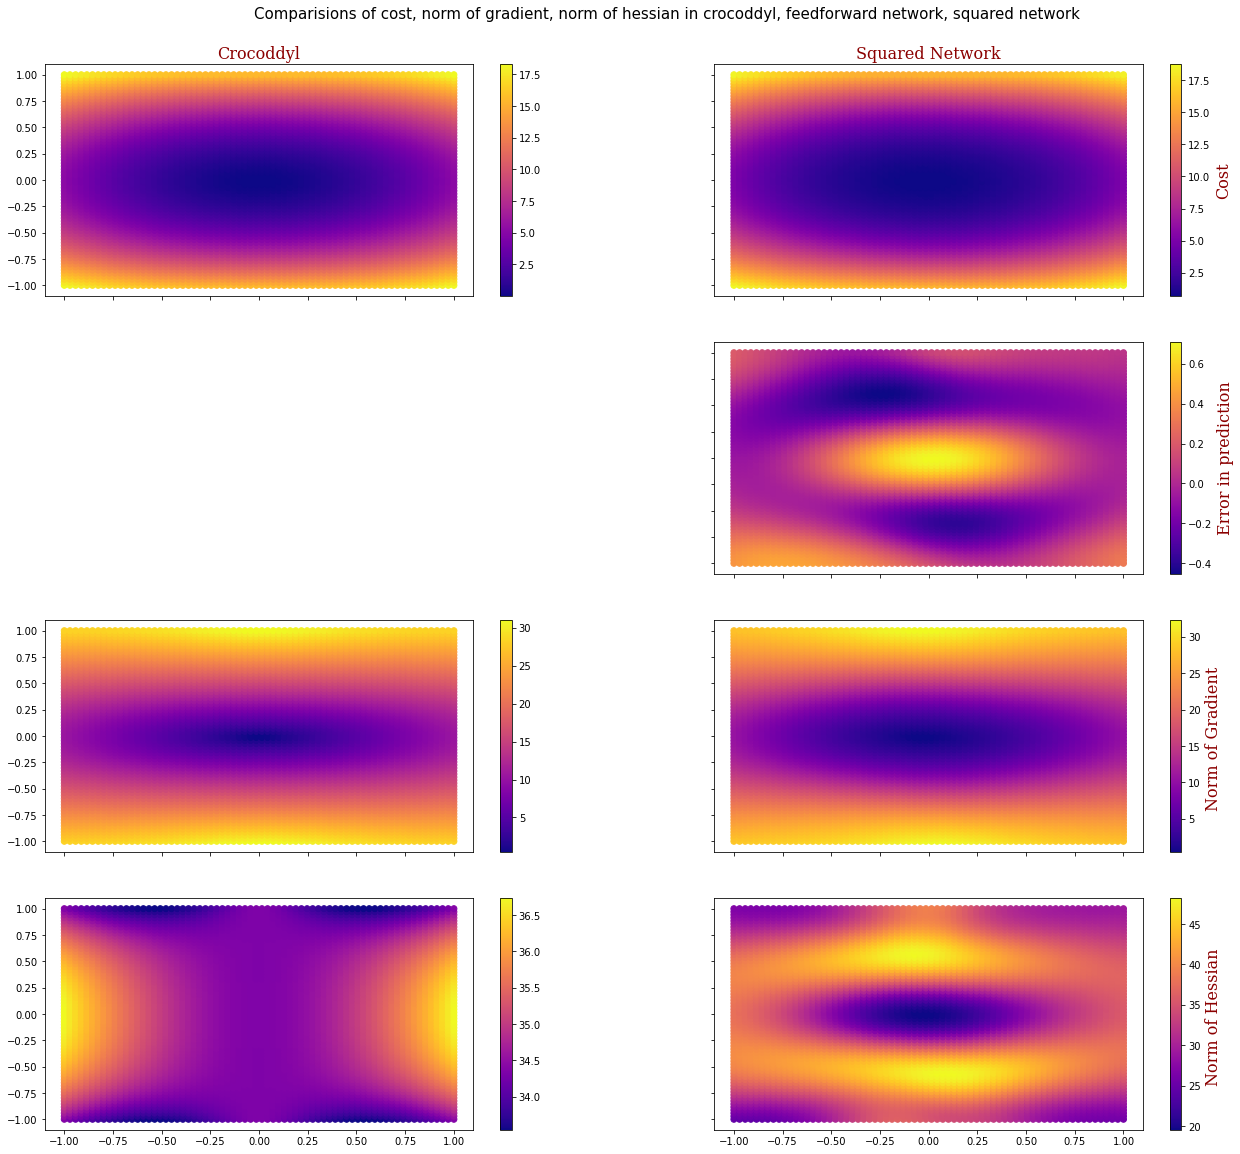

In [9]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Make the figure:

fig, axs = plt.subplots(4, 2, figsize=(18, 20), sharex=True, sharey ='row')
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.95, top=0.94, wspace=0.25)
fig.suptitle(f'Comparisions of cost, norm of gradient, norm of hessian in crocoddyl, feedforward network, squared network', fontsize = 15)

plt.set_cmap('plasma')

# Plot prediction, cost
im1 = axs[0, 0].scatter(x = xtest[:,0], y = xtest[:,1], c = cost_crocoddyl)
fig.colorbar(im1, ax=axs[0, 0])
axs[0, 0].set_title("Crocoddyl", fontdict=font)




im3 = axs[0, 1].scatter(x = xtest[:,0], y = xtest[:,1], c = cost_sqn)
fig.colorbar(im3, ax=axs[0, 1]).set_label("Cost", fontdict=font)
axs[0, 1].set_title("Squared Network", fontdict=font)

axs[1, 0].axis('off')




im4 = axs[1, 1].scatter(x = xtest[:,0], y = xtest[:,1], c = error2)
fig.colorbar(im4, ax=axs[1, 1]).set_label("Error in prediction", fontdict=font)



im5 = axs[2, 0].scatter(x = xtest[:,0], y = xtest[:,1], c = vx_norm)
fig.colorbar(im5, ax=axs[2, 0])




im7 = axs[2, 1].scatter(x = xtest[:,0], y = xtest[:,1], c = sqn_vx_norm)
fig.colorbar(im7, ax=axs[2, 1]).set_label("Norm of Gradient ", fontdict=font)




im8 = axs[3, 0].scatter(x = xtest[:,0], y = xtest[:,1], c = vxx_norm)
fig.colorbar(im8, ax=axs[3, 0])



im10 = axs[3, 1].scatter(x = xtest[:,0], y = xtest[:,1], c = sqn_vxx_norm)
fig.colorbar(im10, ax=axs[3, 1]).set_label("Norm of Hessian ", fontdict=font)

plt.savefig("scatter.png")





